## 3.1

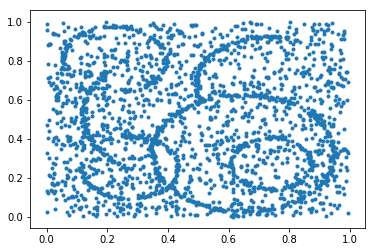

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load("circles.npy")

plt.scatter(data[:,0], data[:,1],  marker=".")
plt.show()

In this picture I can see four clearly recognizable circles

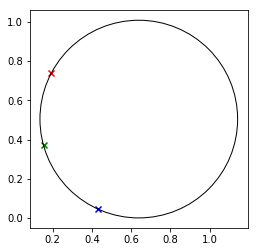

In [2]:
# RANSAC Test if the parameters are correct

xdata = data[:,0]
ydata = data[:,1]
dim = np.shape(xdata)


N = 1
for i in range(N):
    rands = np.random.choice(dim[0], 3, replace=False)
    X = xdata[rands]
    Y = ydata[rands]
    cy = (Y[2]**2+X[2]**2-X[0]**2-Y[0]**2+((Y[2]**2-Y[1]**2+X[2]**2-X[1]**2)/(X[1]-X[2]))*(X[2]-X[0]))
    cy = cy/(-2*Y[0]+2*Y[2]+2*Y[2]*(X[2]-X[0])/(X[1]-X[2])-2*Y[1]*(X[2]-X[0])/(X[1]-X[2]))
    cx = ((Y[2]-cy)**2-(Y[1]-cy)**2+X[2]**2-X[1]**2)/(-2*X[1]+2*X[2])
    r = np.sqrt((Y[2]-cy)**2+(X[2]-cx)**2)



plt.scatter(X[0],Y[0],marker="x", color = 'r') # First point, color red
plt.scatter(X[1],Y[1],marker="x", color = 'g') # Second Point
plt.scatter(X[2],Y[2],marker="x", color = 'b') # Third Point

circle = plt.Circle((cx, cy), radius=r, fill=False) # Create a circle
plt.gca().add_patch(circle) # Add it to the plot
plt.axis('scaled')
plt.show()


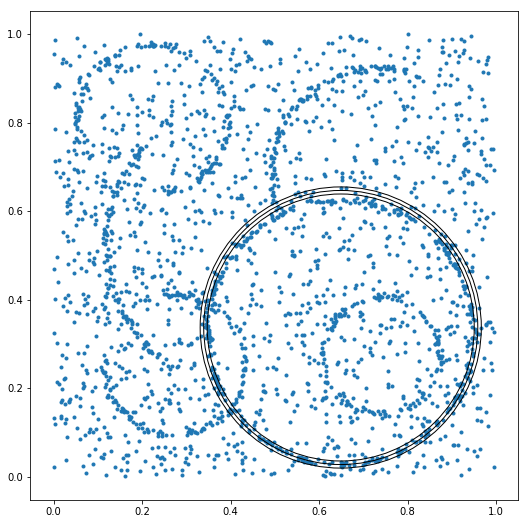

The Inliers for the best fit are:  218


In [18]:
# RANSAC function
def ransac(data, e, N):

    xdata = data[:,0]
    ydata = data[:,1]
    dim = np.shape(xdata)

    max_inliers = 0

    for i in range(N):
        rands = np.random.choice(dim[0], 3, replace=False)
        X = xdata[rands]
        Y = ydata[rands]
        cy = (Y[2]**2+X[2]**2-X[0]**2-Y[0]**2+((Y[2]**2-Y[1]**2+X[2]**2-X[1]**2)/(X[1]-X[2]))*(X[2]-X[0]))
        cy = cy/(-2*Y[0]+2*Y[2]+2*Y[2]*(X[2]-X[0])/(X[1]-X[2])-2*Y[1]*(X[2]-X[0])/(X[1]-X[2]))
        cx = ((Y[2]-cy)**2-(Y[1]-cy)**2+X[2]**2-X[1]**2)/(-2*X[1]+2*X[2])
        r = np.sqrt((Y[2]-cy)**2+(X[2]-cx)**2)

        index = np.arange(dim[0])
        X_rest = xdata
        Y_rest = ydata

        inliers = 0
        inlier_points = []
        inlier_index = []
        for j in range(np.shape(index)[0]):
            dist = np.sqrt((X_rest[j]-cx)**2+(Y_rest[j]-cy)**2)
            if (dist < r+e) and (dist > r-e):
                inliers = inliers + 1
                inlier_points.append([X_rest[j], Y_rest[j]])
                inlier_index.append(j)

        if inliers > max_inliers:
            parameters = [cx, cy, r]
            max_inliers = inliers
            max_inlier_points = inlier_points
            max_inlier_index = inlier_index
    
    return parameters, max_inliers, max_inlier_points, max_inlier_index


fig = plt.figure(figsize=(9, 9))
plt.scatter(xdata,ydata,marker=".")

e = 0.008 #accuracy
parameters, max_inliers, max_inlier_points, max_inlier_index = ransac(data, e, 400)

circle = plt.Circle((parameters[0], parameters[1]), radius=parameters[2], fill=False) # Create a circle
plt.gca().add_patch(circle) # Add it to the plot

circle = plt.Circle((parameters[0], parameters[1]), radius=parameters[2]-e, fill=False) # Create a circle
plt.gca().add_patch(circle) # Add it to the plot

circle = plt.Circle((parameters[0], parameters[1]), radius=parameters[2]+e, fill=False) # Create a circle
plt.gca().add_patch(circle) # Add it to the plot

plt.axis('scaled')
plt.show()
print("The Inliers for the best fit are: ", max_inliers)

(2081, 2)
The Inliers for the best fit are:  350
The Inliers for the best fit are:  150
(1947, 2)
The Inliers for the best fit are:  133
(1833, 2)
The Inliers for the best fit are:  119


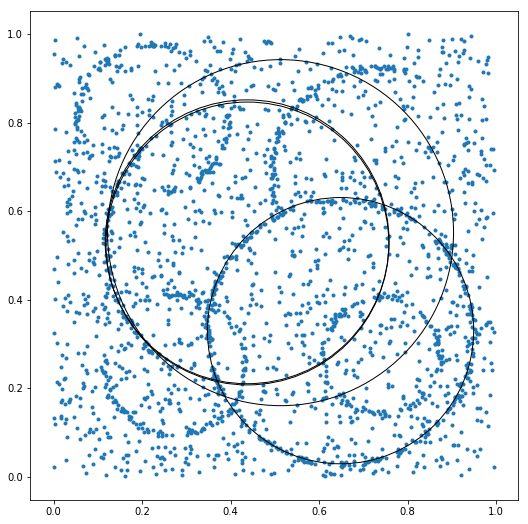

In [43]:
data = np.load("circles.npy")

xdata = np.array(data[:,0])
ydata = np.array(data[:,1])


#FIRST CIRCLE
e = 0.008 #accuracy
parameters, max_inliers, max_inlier_points, max_inlier_index = ransac(data, e, 400)

max_inlier_index = np.array(max_inlier_index)
max_inlier_points = np.array(max_inlier_points)

N = np.shape(xdata)[0]

red_index = np.setdiff1d(np.arange(N), max_inlier_index)
red_x = xdata[red_index]
red_y = ydata[red_index]

red_data = np.array([red_x,red_y]).T
print(np.shape(red_data))

fig = plt.figure(figsize=(9, 9))
plt.scatter(xdata,ydata,marker=".")

circle = plt.Circle((parameters[0], parameters[1]), radius=parameters[2], fill=False) # Create a circle
plt.gca().add_patch(circle) # Add it to the plot


print("The Inliers for the best fit are: ", max_inliers)


#SECOND CIRCLE

parameters, max_inliers, max_inlier_points, max_inlier_index = ransac(red_data, e, 400)

circle = plt.Circle((parameters[0], parameters[1]), radius=parameters[2], fill=False) # Create a circle
plt.gca().add_patch(circle) # Add it to the plot


print("The Inliers for the best fit are: ", max_inliers)

max_inlier_index = np.array(max_inlier_index)

red_index = np.setdiff1d(red_index, max_inlier_index)
red_x = xdata[red_index]
red_y = ydata[red_index]

red_data = np.array([red_x,red_y]).T
print(np.shape(red_data))

#THIRD CIRCLE

parameters, max_inliers, max_inlier_points, max_inlier_index = ransac(red_data, e, 400)

circle = plt.Circle((parameters[0], parameters[1]), radius=parameters[2], fill=False) # Create a circle
plt.gca().add_patch(circle) # Add it to the plot


print("The Inliers for the best fit are: ", max_inliers)
max_inlier_index = np.array(max_inlier_index)

red_index = np.setdiff1d(red_index, max_inlier_index)
red_x = xdata[red_index]
red_y = ydata[red_index]

red_data = np.array([red_x,red_y]).T
print(np.shape(red_data))


#FOURTH CIRCLE

parameters, max_inliers, max_inlier_points, max_inlier_index = ransac(red_data, e, 400)

circle = plt.Circle((parameters[0], parameters[1]), radius=parameters[2], fill=False) # Create a circle
plt.gca().add_patch(circle) # Add it to the plot

plt.axis('scaled')
print("The Inliers for the best fit are: ", max_inliers)

plt.show()

The result is sensitive to e because if you choose it to big, then there is no difference if the circle is shifted in an arbitrary direction. If it's too small none of the points get detected.

## 3.2

The Inliers for the best fit are:  259
0.643612382035 0.32526563289 0.301740050641


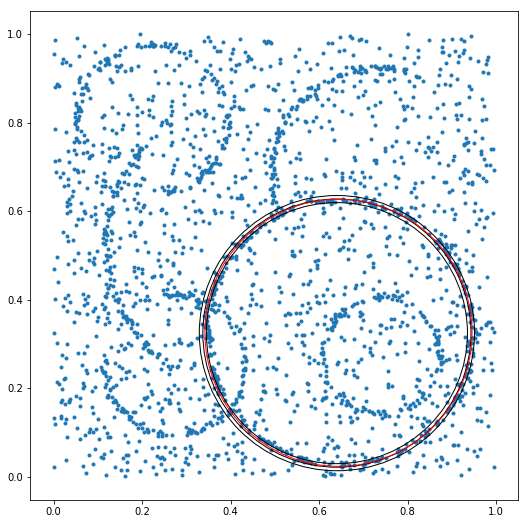

In [5]:
data = np.load("circles.npy")

xdata = data[:,0]
ydata = data[:,1]

fig = plt.figure(figsize=(9, 9))
plt.scatter(xdata,ydata,marker=".")

e = 0.008 #accuracy
parameters, max_inliers, max_inlier_points = ransac(data, e, 400)

circle = plt.Circle((parameters[0], parameters[1]), radius=parameters[2], fill=False) # Create a circle
plt.gca().add_patch(circle) # Add it to the plot

circle = plt.Circle((parameters[0], parameters[1]), radius=parameters[2]-e, fill=False) # Create a circle
plt.gca().add_patch(circle) # Add it to the plot

circle = plt.Circle((parameters[0], parameters[1]), radius=parameters[2]+e, fill=False) # Create a circle
plt.gca().add_patch(circle) # Add it to the plot

plt.axis('scaled')
print("The Inliers for the best fit are: ", max_inliers)

max_inlier_points = np.array(max_inlier_points)

Y = []
for i in range(np.shape(max_inlier_points)[0]):
    Y.append(max_inlier_points[i,:].T.dot(max_inlier_points[i,:]))
    
inlier_x = max_inlier_points[:,0]
inlier_y = max_inlier_points[:,1]

X = np.ones((inlier_x.shape[0],3))

X[:,0] = inlier_x
X[:,1] = inlier_y

b = np.linalg.lstsq(X,Y)[0]

cx = b[0]/2
cy = b[1]/2
r = np.sqrt(b[2]+cx**2+cy**2)

parameters = [cx,cy,r]

print(cx,cy,r)

circle = plt.Circle((parameters[0], parameters[1]), radius=parameters[2], fill=False, edgecolor='r') # Create a circle
plt.gca().add_patch(circle) # Add it to the plot
plt.show()



As one can see in the plot, the algebraic-distance-method (red circle) gives a similar result as the RANSAC-algorithm

## 3.3

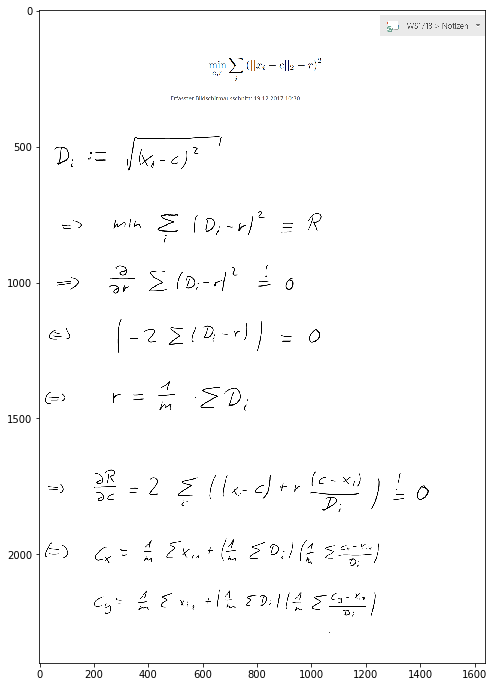

In [48]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
fig = plt.figure(figsize=(12, 12))
img=mpimg.imread('derivation.png')
imgplot = plt.imshow(img)
plt.show()

In [13]:
import scipy.optimize as opt

data = np.load("circles.npy")

xdata = data[:,0]
ydata = data[:,1]

fig = plt.figure(figsize=(9, 9))
plt.scatter(xdata,ydata,marker=".")

e = 0.008 #accuracy
parameters, max_inliers, max_inlier_points = ransac(data, e, 400)

circle = plt.Circle((parameters[0], parameters[1]), radius=parameters[2], fill=False) # Create a circle
plt.gca().add_patch(circle) # Add it to the plot

circle = plt.Circle((parameters[0], parameters[1]), radius=parameters[2]-e, fill=False) # Create a circle
plt.gca().add_patch(circle) # Add it to the plot

circle = plt.Circle((parameters[0], parameters[1]), radius=parameters[2]+e, fill=False) # Create a circle
plt.gca().add_patch(circle) # Add it to the plot

plt.axis('scaled')

print("The Inliers for the best fit are: ", max_inliers)

max_inlier_points = np.array(max_inlier_points)



def f(x, c):
    xdata = x[:,0]
    ydata = x[:,1]
    m = xdata.shape[0]
    cx = 1/m*np.sum(xdata) + (1/m*np.sum(np.sqrt((xdata-c[0])**2+(ydata-c[1])**2))*1/m*np.sum((c[0]-xdata)/(np.sqrt((xdata-c[0])**2+(ydata-c[1])**2))))
    cy = 1/m*np.sum(ydata) + (1/m*np.sum(np.sqrt((xdata-c[0])**2+(ydata-c[1])**2))*1/m*np.sum((c[1]-ydata)/(np.sqrt((xdata-c[0])**2+(ydata-c[1])**2))))
    return [cx,cy]

def residual(p, data):
    return f(data, *p)

p0 = [1]

popt, pcov = opt.leastsq(residual, p0, args=(data))

print(popt)

The Inliers for the best fit are:  350


IndexError: invalid index to scalar variable.